In [5]:
## Import libraries for these exercises
%matplotlib inline
from sklearn.feature_extraction import stop_words
import pandas as pd
from tokenize_resumes import *
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
## Initialize sklearn vectorizer object with our tokenization function
vectorizer = CountVectorizer(tokenizer=spacy_tokenize)

In [8]:
## Calculate vectors for the entire dataset
resume_dataset = get_resumes_dataset()
vectors = vectorizer.fit_transform(resume_dataset.resumes)

In [9]:
## Define a method to compare two resumes (for utility purposes)

def compare_resumes(res1, res2):
    resvec1 = vectorizer.transform([res1])
    resvec2 = vectorizer.transform([res2])
    
    return cosine_similarity(resvec1, resvec2)

In [10]:
## Example of cosine similarity over the entire dataset for a given resume

#cosine_similarity(vectorizer.transform([resume_dataset.resumes[61]]), vectors)

In [11]:
## Define a function to find people like "Kevin" from the first 100 people

like_kevin = sorted(resume_dataset.resumes[0:100], key = lambda x: compare_resumes(resume_dataset.resumes[0], x), reverse=True)

In [12]:
## As above (but using word vectors from spacy)

like_kevin_wv = sorted(resume_dataset.resumes[0:100], key = lambda x: NLP(resume_dataset.resumes[0]).similarity(NLP(x)), reverse=True)

# Term Frequency analysis

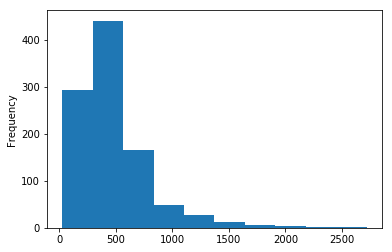

In [13]:

document_lengths = vectors.sum(axis=1).T.tolist()[0]
pd.Series(document_lengths).plot.hist()



In [14]:
terms = pd.DataFrame(vectors.sum(axis=0).T, columns=['frequency'])
terms['name'] = vectorizer.get_feature_names()
terms

,frequency,name
0,1079,$
1,7,'d
2,23,'m
3,2,'re
4,1829,'s
5,23,'ve
6,816,+
7,1,-11
8,2,-12
9,1,-15


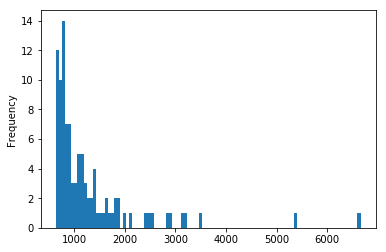

In [15]:
terms.frequency.sort_values(ascending=False)[0:100].plot.hist(bins=100)

In [16]:
terms.sort_values(by='frequency', ascending=False)

,frequency,name
19941,6658,sales
14106,5379,ma
4657,3511,business
14389,3183,marketing
15787,3160,new
7435,2882,development
14244,2860,management
21042,2553,software
24674,2483,work
6843,2433,customer


## TF-IDF and stopwords example

In [17]:
vectorizer_stopwords = TfidfVectorizer(stop_words=None)
vectors_stopwords = vectorizer_stopwords.fit_transform(resume_dataset.resumes)

vectorizer_nostopwords = TfidfVectorizer(stop_words='english')
vectors_nostopwords = vectorizer_nostopwords.fit_transform(resume_dataset.resumes)


terms_stopwords = pd.DataFrame(vectors_stopwords.sum(axis=0).T, columns=['frequency'])
terms_stopwords['name'] = vectorizer_stopwords.get_feature_names()

terms_nostopwords = pd.DataFrame(vectors_nostopwords.sum(axis=0).T, columns=['frequency'])
terms_nostopwords['name'] = vectorizer_nostopwords.get_feature_names()

,frequency,name
0,1079,$
1,7,'d
2,23,'m
3,2,'re
4,1829,'s
5,23,'ve
6,816,+
7,1,-11
8,2,-12
9,1,-15
